In [ ]:
from google.colab import drive
drive.mount('/MultiClusterGAN')
%cd /MultiClusterGAN/MyDrive/CNS/
%pip install  umap-learn scanpy leidenalg

Mounted at /MultiClusterGAN
/MultiClusterGAN/MyDrive/CNS
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 33.0 MB/s 
     |████████████████████████████████| 1.4 MB 57.6 MB/s 
     |████████████████████████████████| 1.1 MB 67.1 MB/s 
     |████████████████████████████████| 91 kB 9.4 MB/s 
     |████████████████████████████████| 3.1 MB 13.7 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=923d0037ead1e8b31faba7963ba8c1294be754c420883e6a3c368a069e1ab9bf
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=23b7fa4b2de3a58c3e4eba7b8980576c888f0feeacbd067419fa8fe79e5d3f59
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created w

In [ ]:
# Loading the Packages

%reload_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from tifffile import tifffile
from scipy import ndimage

# from starmap.obj import STARMapDataset, load_data
# import starmap.analyze as anz
# import starmap.viz as viz
# import starmap.sc_util as su
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from anndata import AnnData
from sklearn.cluster import AgglomerativeClustering


read data

In [ ]:
adata=sc.read_h5ad('data/20220313_adata_final.h5ad')
# adata.obs.loc[np.sort(adata.obs.index.astype('int')).astype('str'),:].to_csv('pd_tissue.csv')

In [ ]:
rank_colors=pd.read_csv('data/20220125_Combined_Final_Manual_Annotation.xlsx - Rank1_5colors.csv')
### choose column for cell type colors
color_name='Color_white7'

rank_colors_5=rank_colors.loc[rank_colors['Rank']==5,:].copy()

rank5_color_dict={}
for idx in np.arange(rank_colors_5.shape[0]):
    h=list(rank_colors_5[color_name])[idx].lstrip('#')
    rank5_color_dict[list(rank_colors_5['Refined name'])[idx]]=list(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

In [ ]:
sample_name = {
    'well01brain',
    'well01OB',
    'well03',
    'well04',
    'well05',
    'well06',
    'well07',
    'well08',
    'well09',
    'well10',
    'well11',
    'well1_5',
    'well2_5',
    'well3_5',
    'well7_5',
    'well10_5',
    'sagittal1',
    'sagittal2',
    'sagittal3'
}

choose a sample

In [ ]:
sample='sagittal2'
print(sample)
adata_sample=adata[adata.obs['sample']==sample,:]
pd_sample=adata_sample.obs

sagittal2


plot on grey cells

(-3428.9301369862997, 72007.53287671228, -1674.95, 35173.95)

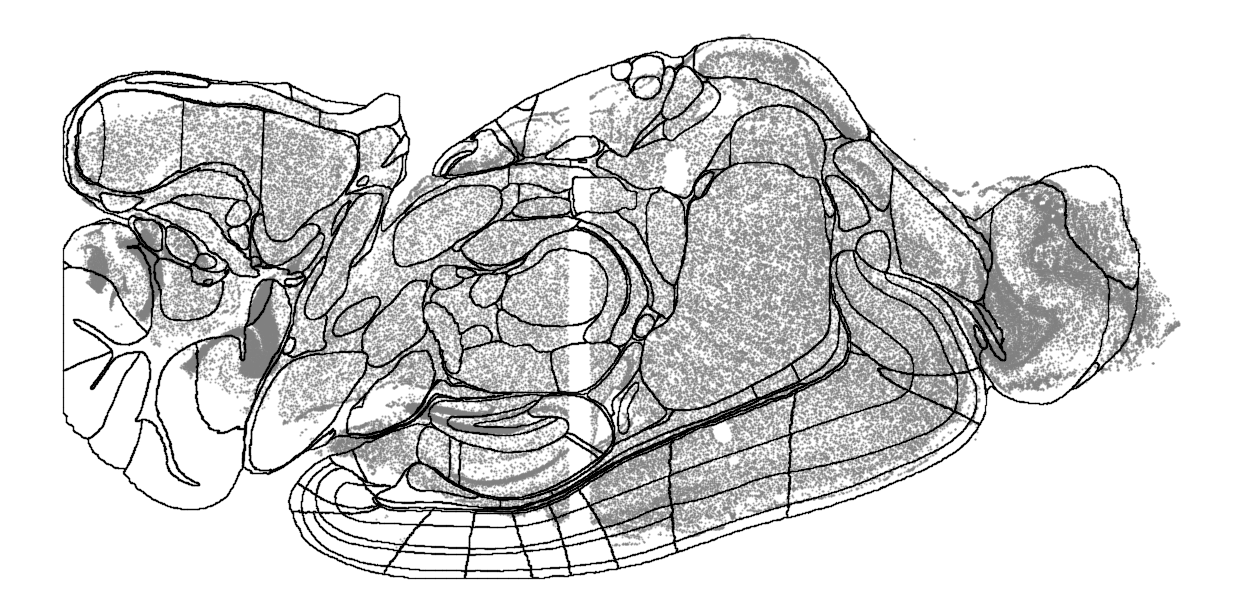

In [ ]:
plt.figure(figsize=(int(max(pd_sample['row'])/3000),int(max(pd_sample['col'])/3000)))

### plot cells
plt.scatter(pd_sample['row'],pd_sample['col'],s=max(pd_sample['row'])/48000,c='grey',alpha=0.5)

### plot boundary
boundary_size=0.03
image04 = tifffile.imread('tissue_region/output_data/annotation/ccf_'+sample+'_celltypemap-rgb-1.tif');
sx = ndimage.sobel(image04,axis=0,mode='constant')
sy = ndimage.sobel(image04,axis=1,mode='constant')
sobel=np.hypot(sx,sy)
out_tpl04 = np.nonzero(sobel)

indices=np.where(image04[out_tpl04[0],out_tpl04[1]]>1)
out_tpl04_new=[out_tpl04[0][indices],out_tpl04[1][indices]]

plt.scatter(out_tpl04_new[1]*15,out_tpl04_new[0]*15,c='k',s=boundary_size)

plt.axis('off')

plot on colorful cells

In [ ]:
plt.figure(figsize=(int(max(pd_sample['row'])/3000),int(max(pd_sample['col'])/3000)))

### plot cells
plt.scatter(pd_sample['row'],pd_sample['col'],s=max(pd_sample['row'])/20000,
            alpha=0.6,
            c=[rank5_color_dict[i] for i in pd_sample['Rank5_Symbol']],
          )


### plot boundary
boundary_size=0.03
image04 = tifffile.imread('tissue_region/output_data/annotation/ccf_'+sample+'_celltypemap-rgb-1.tif');
sx = ndimage.sobel(image04,axis=0,mode='constant')
sy = ndimage.sobel(image04,axis=1,mode='constant')
sobel=np.hypot(sx,sy)
out_tpl04 = np.nonzero(sobel)

plt.scatter(out_tpl04[1]*16,out_tpl04[0]*16,c='k',s=boundary_size)

plt.axis('off')
# plt.savefig('.png',dpi=300)

Output hidden; open in https://colab.research.google.com to view.